## 手机销量分析

### 项目背景 
- 某电商商城随着业务量的发展，积累了大量的用户手机销售订单数据。决策层希望能够通过对这些数据的分析了解更多的用户信息及用户的分布，从而可以指导下一年的市场营销方案以及更加精准的定位市场，进行广告投放。 


### 数据说明 
- 数据时间从 2017.01.01至2019.03.31 共41800 条，数据存储在 excel 文件 中（Phone.xlsx）。

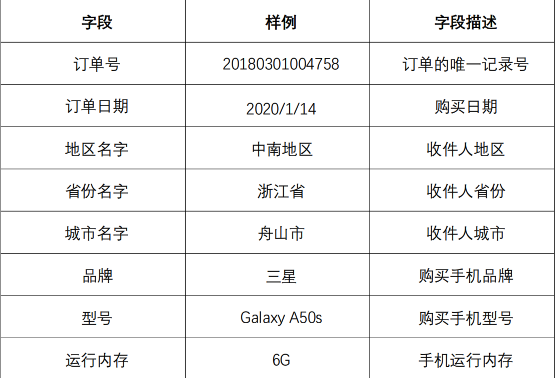

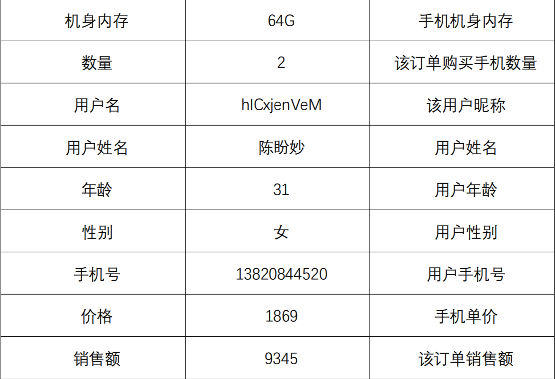

In [1]:
import pandas as pd
data = pd.read_excel('./data/Phone.xlsx')
data.head(5)

,订单号,订单日期,年,月,地区名字,省份名字,城市名字,品牌,型号,运行内存,机身内存,数量,用户名,用户姓名,年龄,年龄段,性别,手机号,价格,销售额
0,20180301004758,2020-01-14,NaN,NaN,中南地区,广西壮族自治区,梧州市,荣耀,荣耀9X,6G,64G,2,RVwhqiwMFc,刘捷,33,NaN,男,13794074871,1299,2598
1,20180301004759,2018-01-20,NaN,NaN,华东地区,浙江省,舟山市,三星,Galaxy A50s,6G,128G,5,hICxjenVeM,陈盼妙,31,NaN,女,13820844520,1869,9345
2,20180301004760,2019-06-15,NaN,NaN,西北地区,甘肃省,白银市,小米,红米K30 Pro,8G,256G,3,RSXOFBOwki,张浩,18,NaN,男,15931162888,3999,11997
3,20180301004761,2019-01-07,NaN,NaN,中南地区,河南省,许昌市,小米,红米Note8,8G,128G,6,OtUMUlCBuK,辛倩,31,NaN,女,13084447501,1518,9108
4,20180301004762,2019-05-21,NaN,NaN,直辖市,北京市,北京市,vivo,New 3S,6G,128G,4,eikoQvIyUR,徐旭,33,NaN,女,13226875372,5298,21192


In [3]:
data.shape

(41800, 20)

- 查看缺失数据的个数和占比

In [4]:
#查看缺失数据
for col in data.columns:
    null_count = data[col].isnull().sum(axis=0)
    if null_count > 0:
        p = str(null_count / data[col].size * 100)+'%'
        print(col+':'+p)

年:100.0%
月:100.0%
年龄段:100.0%


- 缺失值处理

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41800 entries, 0 to 41799
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   订单号     41800 non-null  int64         
 1   订单日期    41800 non-null  datetime64[ns]
 2   年       0 non-null      float64       
 3   月       0 non-null      float64       
 4   地区名字    41800 non-null  object        
 5   省份名字    41800 non-null  object        
 6   城市名字    41800 non-null  object        
 7   品牌      41800 non-null  object        
 8   型号      41800 non-null  object        
 9   运行内存    41800 non-null  object        
 10  机身内存    41800 non-null  object        
 11  数量      41800 non-null  int64         
 12  用户名     41800 non-null  object        
 13  用户姓名    41800 non-null  object        
 14  年龄      41800 non-null  int64         
 15  年龄段     0 non-null      float64       
 16  性别      41800 non-null  object        
 17  手机号     41800 non-null  int64         
 18  价格    

In [6]:
data['年'] = data['订单日期'].dt.year
data['月'] = data['订单日期'].dt.month

In [7]:
#对年龄段列进行空值填充
data['年龄'].max(),data['年龄'].min()

(49, 16)

In [8]:
#分箱cut
data['年龄段'] = pd.cut(data['年龄'],bins=[-1,16,26,36,49],labels=['<=16','17-26','27-36','37-49'])
#参数bins：年龄段的划分


In [10]:
data

,订单号,订单日期,年,月,地区名字,省份名字,城市名字,品牌,型号,运行内存,机身内存,数量,用户名,用户姓名,年龄,年龄段,性别,手机号,价格,销售额
0,20180301004758,2020-01-14,2020,1,中南地区,广西壮族自治区,梧州市,荣耀,荣耀9X,6G,64G,2,RVwhqiwMFc,刘捷,33,27-36,男,13794074871,1299,2598
1,20180301004759,2018-01-20,2018,1,华东地区,浙江省,舟山市,三星,Galaxy A50s,6G,128G,5,hICxjenVeM,陈盼妙,31,27-36,女,13820844520,1869,9345
2,20180301004760,2019-06-15,2019,6,西北地区,甘肃省,白银市,小米,红米K30 Pro,8G,256G,3,RSXOFBOwki,张浩,18,17-26,男,15931162888,3999,11997
3,20180301004761,2019-01-07,2019,1,中南地区,河南省,许昌市,小米,红米Note8,8G,128G,6,OtUMUlCBuK,辛倩,31,27-36,女,13084447501,1518,9108
4,20180301004762,2019-05-21,2019,5,直辖市,北京市,北京市,vivo,New 3S,6G,128G,4,eikoQvIyUR,徐旭,33,27-36,女,13226875372,5298,21192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41795,20180301046136,2018-10-27,2018,10,直辖市,北京市,北京市,iphone,iPhone 7,8G,128G,1,TpExommoji,刘成,33,27-36,男,15049712657,2899,2899
41796,20180301046137,2018-10-12,2018,10,西南地区,四川省,遂宁市,荣耀,荣耀Play3,4G,64G,6,dqXIPqeMbX,徐纯青,31,27-36,男,18569841421,879,5274
41797,20180301046138,2020-01-08,2020,1,中南地区,广东省,江门市,中兴,A3,3G,32G,4,EqByToaokF,刘开俊,33,27-36,女,13861663227,729,2916
41798,20180301046139,2019-10-12,2019,10,华北地区,河北省,承德市,小米,红米K30,6G,64G,1,owrdutxlZX,张钦恒,20,17-26,男,13969234940,1999,1999


- 查看消费者对不同手机品牌的青睐程度

In [13]:
#查看不同品牌手机的累计销量和累计销售额,且对累计销量进行降序
df1 = data.groupby(by='品牌')[['数量','价格']].sum().sort_values('数量',ascending=False)
df1.columns = ['累计销量','累计销售额']
df1

,累计销量,累计销售额
品牌,,
vivo,20601,17286123
小米,17889,11702854
iphone,14954,23121568
华为,14623,13840588
三星,13551,18434020
中兴,12981,5905926
魅族,12532,6196689
oppo,12454,14794031
荣耀,12270,6452032


- 查看不同品牌的不同型号数量

In [14]:
p_count = []
for p in df1.index:
    count = data.loc[data['品牌'] == p]['型号'].nunique()
    p_count.append([p,count])
    
df2 = pd.DataFrame(p_count,columns=['品牌','型号数量'])
df2

,品牌,型号数量
0,vivo,15
1,小米,13
2,iphone,12
3,华为,12
4,三星,11
5,中兴,11
6,魅族,9
7,oppo,10
8,荣耀,9
9,联想,7


- 查看不同月份的销量情况，哪些月份销量比较高

In [16]:
data.groupby(by='月')['数量'].count().sort_values(ascending=False)
#1，2,3月份销量最好

月
3     4705
1     4674
2     4431
5     3176
12    3169
7     3133
10    3123
11    3118
8     3109
4     3071
6     3053
9     3038
Name: 数量, dtype: int64

- 不同年龄段的购买力

In [17]:
data.groupby(by=['年龄段'])['数量'].count().sort_values(ascending=False)

年龄段
17-26    21229
27-36    19675
<=16       514
37-49      382
Name: 数量, dtype: int64

- 查看不同省份不同城市的购买力情况

In [18]:
data.pivot_table(index=['省份名字','城市名字'],values=['数量'],
                 aggfunc='count').sort_values('数量',ascending=False)

数量
省份名字 城市名字      
上海市  上海市   6326
北京市  北京市   6301
河北省  张家口市   259
     秦皇岛市   249
     石家庄市   248
...         ...
广东省  湛江市     69
山东省  潍坊市     69
甘肃省  兰州市     68
福建省  漳州市     66
河南省  许昌市     65

[292 rows x 1 columns]

- 查看不同品牌的不同机身内存的订单量（只考虑订单量，不考虑一个订单中包含几个已购商品）

In [20]:
pd.crosstab(data['品牌'],data['机身内存'])

机身内存,128G,16G,256G,32G,64G
品牌,,,,,
iphone,1394,0,1438,334,1113
oppo,2822,0,360,0,387
vivo,4430,0,728,0,741
一加,331,0,0,0,1392
三星,3164,0,721,0,0
中兴,318,736,0,1252,1414
华为,3158,0,333,0,667
小米,2113,0,1095,0,1819
联想,0,0,0,1401,1038
